<h1><center> BANK CUSTOMER CHURN PREDICTION </center></h1><br>
<b>Customer churn </b> can be defined as the customer terminates any relationship with a company that provides services either online or offline. Churn prediction can be referred to as the prediction of customers who are likely to cancel a subscription, product or service. 

<h3><b>:::::Importing following libraries:::::</b></h3>
<ol>
    <li><b>Pandas::</b> For the data manipulation and analysis.</li>
    <li><b>Matplotlib::</b> For the data visualization.</li>
    <li><b>Seaborn::</b> For the data visualization built on the top of the matplotlib library.</li>
    <li><b>Keras::</b> For building the neural network built on the Tensorflow backend.</li>
    <li><b>Plotly::</b> For the data visualization but creates more creative plots and provides a lot of custom ability.</li>
    <li><b>Warning::</b> For dealing with the warnings coming while execution of the lines of code.</li>
</ol>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras as keras


import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


<h3><b>::::: Importing dataset:::::</b></h3><br>
The data is imported using the pandas (alias name pd) pre-defined function read_csv() as our data file format is csv (comma-seprated values) in the dataset variable.

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

<h3><b>:::::The snapshot of the imported data:::::</b></h3><br>
As the dataset variable of DATA_FRAME type so we can use the head() function to show the top 5 rows/tuples of the whole dataset.

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3><b>:::::The featuers and Class_Label of the data:::::</b></h3><br>
<ol>
    <li><b>RowNumber:</b> The index number of the row.</li>
    <li><b>CusomerId:</b> The customer ID. </li>
    <li><b>Surname:</b> The last name of the customer.</li>
    <li><b>CreditScore:</b> The credit score given by the bank.</li>
    <li><b>Geography:</b> Country that customer belongs.\begin{equation}
Geography \: \: \epsilon \: \:  R^{\{France,Germany,Spain\}}
\end{equation}</li>
    <li><b>Gender:</b> The gender of the customer. \begin{equation}
Gender \: \: \epsilon \: \:  R^{\{Male\:,\:Female\}}
\end{equation}</li>
    <li><b>Age:</b>The age of the customer.</li>
    <li><b>Tenure:</b>Number of years customer is with the bank.</li>
    <li><b>Balance:</b>The current balance of the account.</li>
    <li><b>NumOfProducts:</b>The number of the products taken by the customer.\begin{equation}
NumOfProducts \: \: \epsilon \: \:  R^{\{1\:,\:2\:,\:3\:,\:4\:\}}
\end{equation}</li>
    <li><b>HasCrCard:</b> Is customer owing a credit card or not. \begin{equation}
HasCrCard \: \: \epsilon \: \:  R^{\{\:0\: = \:No\:,\: 1\: =\: Yes\:\}}
\end{equation}</li>
    <li><b>IsActiveMember:</b>Is customer is active or not.\begin{equation}
IsActiveMember \: \: \epsilon \: \:  R^{\{\:0\: = \:No\:,\: 1\: =\: Yes\:\}}
\end{equation}</li>
    <li><b>EstimatedSalary:</b>The annual salary of the customers.</li>
    <li><b>Exited:</b>The <b>CLASS LABEL</b> whether customer still with bank or not.\begin{equation}
Exited \: \: \epsilon \: \:  R^{\{\:0\: = \:No\:,\: 1\: =\: Yes\:\}}
\end{equation}</li>
</ol>

In [4]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<h3><b>:::::The dimension of the dataframe in the matrix format (rows,columns):::::</b></h3>

In [5]:
dataset.shape

(10000, 14)

<h3><b>:::::To check the missing values:::::</b></h3><br>
The function isna() will check the missing values column wise (default axis = 0 (column-wise)) and sum() will do the submission at the end.

<h4><b>:::::Our Analysis on the missing values:::::</b></h4><br>
The data contains the 0 missing values.

In [6]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h3><b>:::::The Data in the form of the Descriptive Statistics:::::</b></h3><br>
The descriptive statistics provide us a information of numerical featuers in the term of the Mean, Standard Deviation and 5 elements of the box plot (Min, Max, Q1, Q2, Q3).

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


<h3><b>:::::To check the uniques terms in the each features:::::</b></h3><br>
The function nunique() will check the unique values column wise (default axis = 0 (column-wise)).

In [8]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<h3><b>:::::Dropping the unsignificant featuers:::::</b></h3><br>
The function dataset_name.drop(["LIST_OF_FEATUERS"], axis = 0/1) will drop the columns (when axis=1) and rows (when axis=0).

In [9]:
dataset = dataset.drop(["RowNumber", "CustomerId","Surname"], axis = 1)

<h3><b>:::::Data Division on the basis of class label:::::</b></h3><br>

In [10]:
churn     = dataset[dataset["Exited"] == 1]
not_churn = dataset[dataset["Exited"] == 0]

<h3><b>:::::The feature division on the basis of the unqiues:::::</b></h3><br>
The fetuers will be divided on the basis of the number of the uniques (uniques less than 6) into categorical featuers and remaining the numerical featuers.

In [11]:
target_column = ["Exited"]
categorical_column   = dataset.nunique()[dataset.nunique() < 6].keys().tolist()
categorical_column   = [x for x in categorical_column if x not in target_column]
numerical_column   = [x for x in dataset.columns if x not in categorical_column + target_column]

<h3><b>:::::The categorical and numerical featuers:::::</b></h3><br>

The <b>categorical featuers</b> are:
<ol>
    <li>Geography <b>(Geography)</b></li>
    <li>Gender <b>(Gender)</b></li>
    <li>Number of Products <b>(NumOfProducts)</b></li>
    <li>Customer having the credit card or not <b>(HasCrCard)</b></li>
    <li>Customer is active with bank or not <b>(IsActiveMember)</b></li>
</ol>

The <b>numerical featuers</b> are:
<ol>
    <li>The credit score of the customer <b>(CreditScore)</b></li>
    <li>The age of the customer <b>(Age)</b></li>
    <li>The tenure of the customer with the bank <b>(Tenure)</b></li>
    <li>The balance of the customer's account <b>(Balance)</b></li>
    <li>The estimated salary of the customer <b>(EstimatedSalary)</b></li>
</ol>
    

In [12]:
print("\tCategorical Featuers")
print(categorical_column)
print("\n**********************************************")
print("\tNumerical Featuers")
print(numerical_column)

	Categorical Featuers
['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

**********************************************
	Numerical Featuers
['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


<h3><b>:::::The user-defined function to visualize the categorical features:::::</b></h3><br>
The customized pie function using the plotly library will generate the pie charts for the categorical featuers in the 2-dimensional plane and grouped by the Exited (CLASS LABEL).

In [13]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

<h3><b>:::::The user-defined function to visualize the Geography feature:::::</b></h3><br>
The customized pie function will generate the pie charts for the Geography feature in the 2-dimensional plane and grouped by the Exited (CLASS LABEL).

In [14]:
plot_pie(categorical_column[0])

<h3><b>:::::The user-defined function to visualize the Gender feature:::::</b></h3><br>
The customized pie function will generate the pie charts for the Gender feature in the 2-Dimensional plane and grouped by the Exited (CLASS LABEL).

In [15]:
plot_pie(categorical_column[1])

<h3><b>:::::The user-defined function to visualize the NumOfProducts feature:::::</b></h3><br>
The customized pie function will generate the pie charts for the NumOfProducts feature in the 2-dimensional plane and grouped by the Exited (CLASS LABEL).

In [16]:
plot_pie(categorical_column[2])

<h3><b>:::::The user-defined function to visualize the HasCrCard feature:::::</b></h3><br>
The customized pie function will generate the pie charts for the HasCrCard feature in the 2-dimensional plane and grouped by the Exited (CLASS LABEL).

In [17]:
plot_pie(categorical_column[3])

<h3><b>:::::The user-defined function to visualize the IsActiveMember feature:::::</b></h3><br>
The customized pie function will generate the pie chart for the IsActiveMember feature in the 2-dimensional plane and grouped by the Exited (CLASS LABEL).

In [18]:
plot_pie(categorical_column[4])

<h3><b>:::::The user-defined function to visualize the numerical features in the histogram plots:::::</b></h3><br>
The customized histogram function using the plotly library will generate the histogram charts for the numerical featuers in the 2-dimensional plane and grouped by the Exited (CLASS LABEL).

In [19]:
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

<h3><b>:::::The function is called to visualize the numerical feature (Credit Score):::::</b></h3><br>
<ol>
    <li>The mean of the churn customers credit score is 625-629. </li>
    <li>The mean of the Non churn customers credit score is 680-684. </li>
</ol>

In [82]:
histogram(numerical_column[0])

<h3><b>:::::The function is called to visualize the numerical feature (Age):::::</b></h3><br>
<ol>
    <li>The mean of the churn customers age is 46. </li>
    <li>The mean of the Non churn customers age is 35. </li>
</ol>

In [21]:
histogram(numerical_column[1])

<h3><b>:::::The function is called to visualize the numerical feature (Tenure):::::</b></h3><br>

In [22]:
histogram(numerical_column[2])

<h3><b>:::::The function is called to visualize the numerical feature (Balance):::::</b></h3><br>
<ol>
    <li>The mean of the churn customers balance came 107.5k - 112.5k. </li>
    <li>The mean of the Non churn customers balance came 112.5k - 117.5k. </li>
</ol>
Balance value in $ (dollars).

In [23]:
histogram(numerical_column[3])

<h3><b>:::::The function is called to visualize the numerical feature (Estimated Salary):::::</b></h3><br>

In [24]:
histogram(numerical_column[4])

<h3><b>:::::The visualization of the dataset on the pair-plot:::::</b></h3><br>
 A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

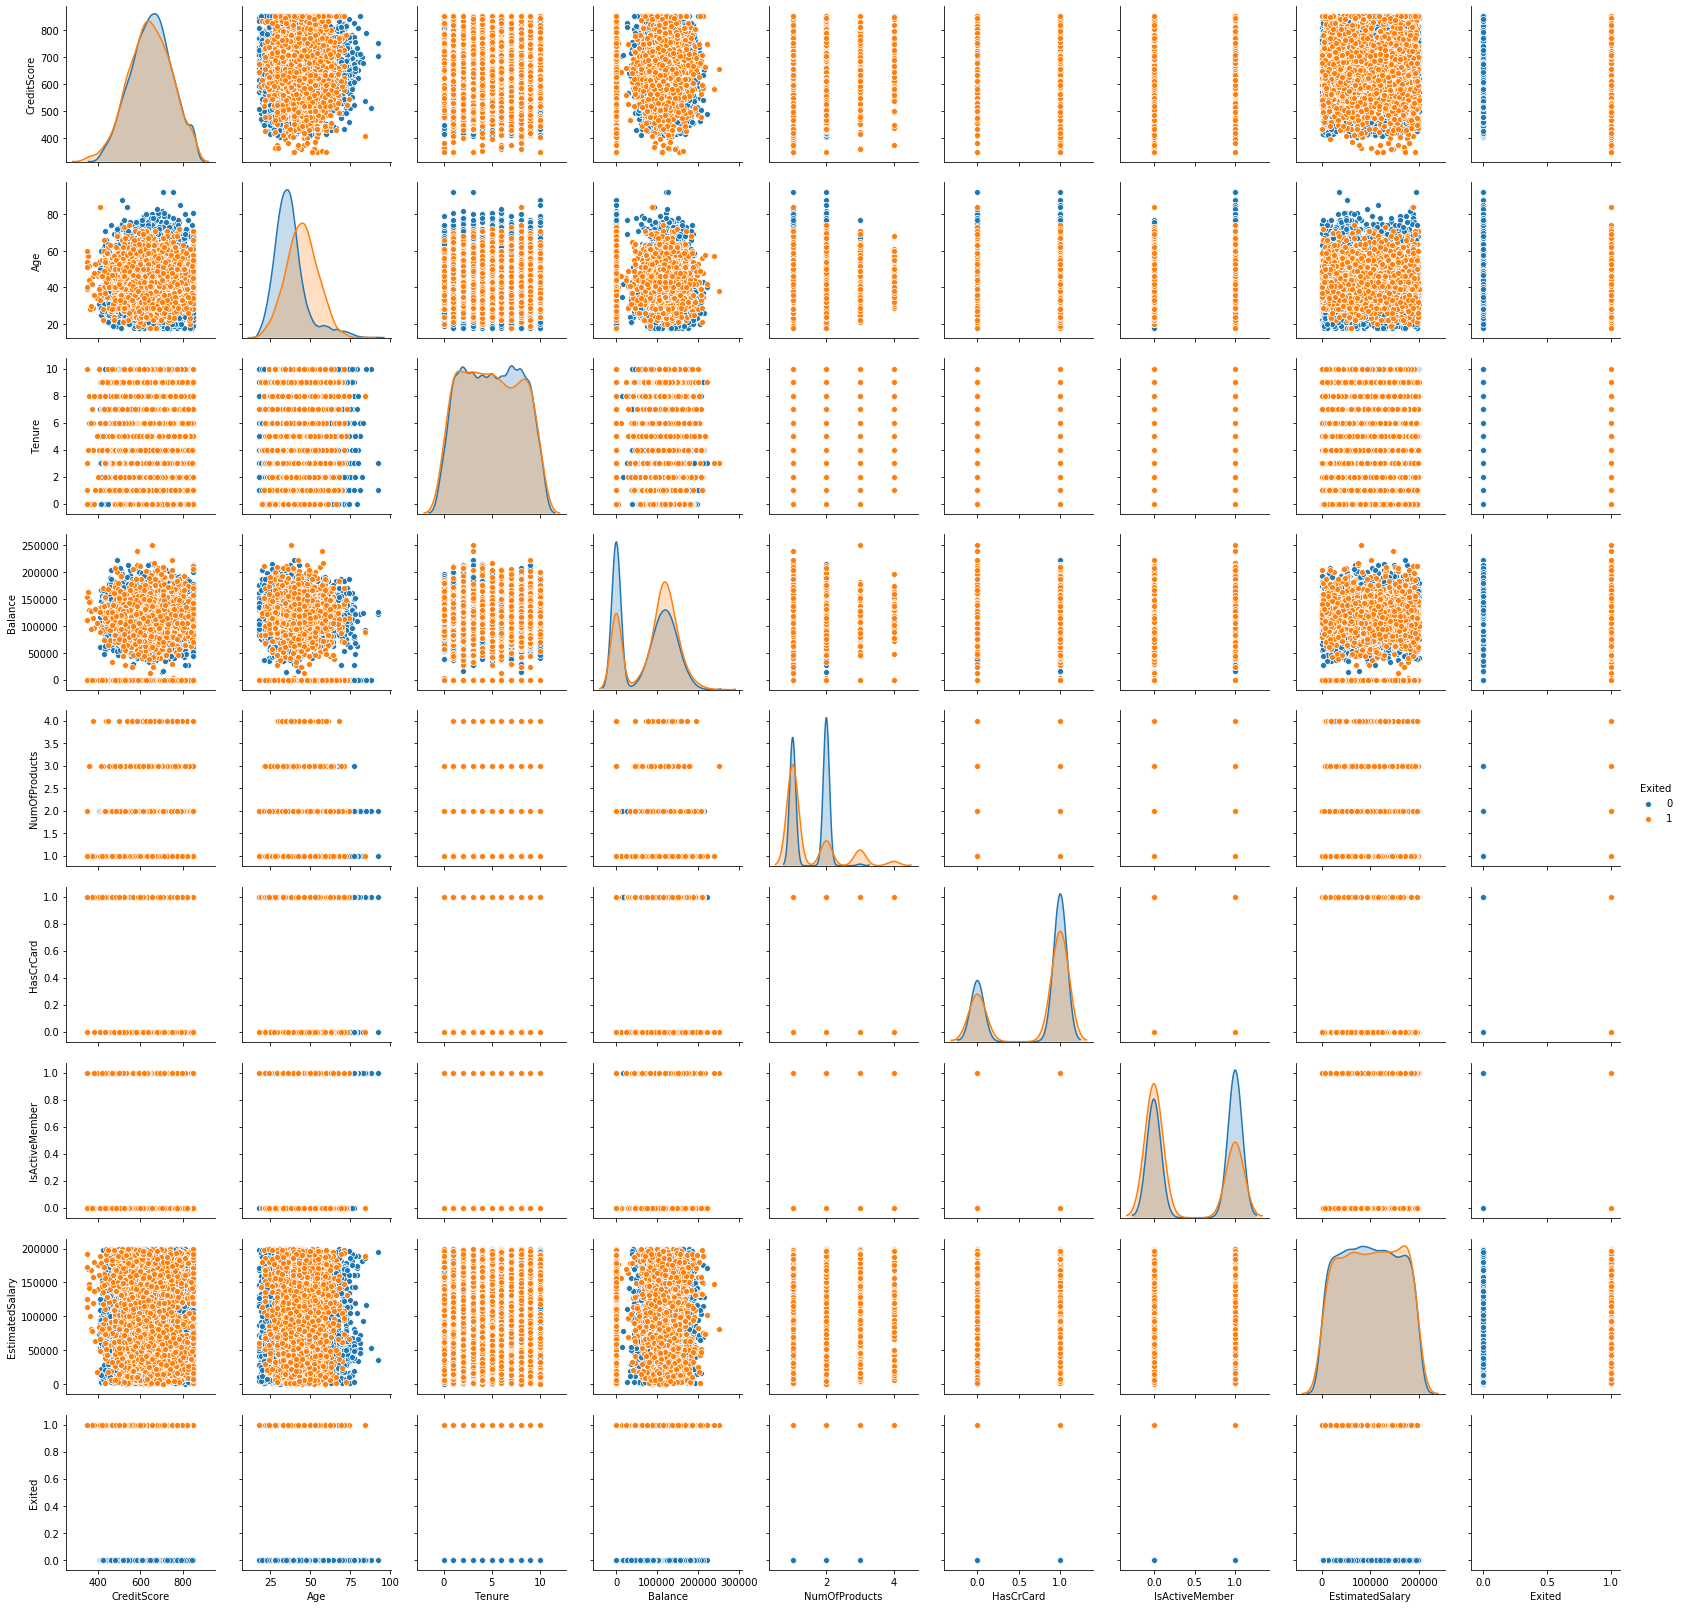

In [25]:
sns.pairplot(dataset, kind ='scatter', hue= "Exited")

In [26]:
"""
Gender_division = dataset["Gender"].value_counts()
print("Gender Division\n")
print(Gender_division)
print("*****************************************************")
Has_card = dataset["HasCrCard"].value_counts()
print("Customer having the cards\n")
print(Has_card)
print("1 = Yes, 0 = No")
print("*****************************************************")
num_prod = dataset["NumOfProducts"].value_counts()
print(num_prod)
print("*****************************************************")
country = dataset["Geography"].value_counts()
print(country)
print("*****************************************************")
tenure = dataset["Tenure"].value_counts()
print(tenure)
print("*****************************************************")
active_member = dataset["IsActiveMember"].value_counts()
print(active_member)
print("1 = Active, 0 = Not Active")
print("*****************************************************")
cust_status = dataset["Exited"].value_counts()
print(cust_status)
print("1 = Customer Left, 0 = Not Left")
"""

'\nGender_division = dataset["Gender"].value_counts()\nprint("Gender Division\n")\nprint(Gender_division)\nprint("*****************************************************")\nHas_card = dataset["HasCrCard"].value_counts()\nprint("Customer having the cards\n")\nprint(Has_card)\nprint("1 = Yes, 0 = No")\nprint("*****************************************************")\nnum_prod = dataset["NumOfProducts"].value_counts()\nprint(num_prod)\nprint("*****************************************************")\ncountry = dataset["Geography"].value_counts()\nprint(country)\nprint("*****************************************************")\ntenure = dataset["Tenure"].value_counts()\nprint(tenure)\nprint("*****************************************************")\nactive_member = dataset["IsActiveMember"].value_counts()\nprint(active_member)\nprint("1 = Active, 0 = Not Active")\nprint("*****************************************************")\ncust_status = dataset["Exited"].value_counts()\nprint(cust_status)\nprint

In [27]:
"""
#Gender_division = Gender_division.to_frame()
#Gender_division.insert(0, column="Gender_Type" , value = ("Male","Female"))
#Gender_division

Has_card = Has_card.to_frame()
Has_card.insert(0, column ="Taken_Card", value = ("Yes","No"))

country = country.to_frame()
country.insert(0, column="Country_Name", value= ("France", "Germany", "Spain"))
"""

'\n#Gender_division = Gender_division.to_frame()\n#Gender_division.insert(0, column="Gender_Type" , value = ("Male","Female"))\n#Gender_division\n\nHas_card = Has_card.to_frame()\nHas_card.insert(0, column ="Taken_Card", value = ("Yes","No"))\n\ncountry = country.to_frame()\ncountry.insert(0, column="Country_Name", value= ("France", "Germany", "Spain"))\n'

In [28]:
"""
labels = ["France", "Germany","Spain"]
size = country.iloc[:,1]
explode = (0.1,0.1,0.1)
colors = ["c","r","g"]

fig1, ax1 = plt.subplots()
ax1.pie(size, explode= explode, labels= labels, colors=colors,
       autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis = ("equal")
plt.tight_layout()
plt.show()
"""

'\nlabels = ["France", "Germany","Spain"]\nsize = country.iloc[:,1]\nexplode = (0.1,0.1,0.1)\ncolors = ["c","r","g"]\n\nfig1, ax1 = plt.subplots()\nax1.pie(size, explode= explode, labels= labels, colors=colors,\n       autopct = "%1.1f%%", shadow = True, startangle = 90)\nax1.axis = ("equal")\nplt.tight_layout()\nplt.show()\n'

In [29]:
"""
labels = ["Yes", "No"]
size = Has_card.iloc[:,1]
explode = (0.1,0)
colors = ["#ff9999","#99ff99"]

fig1, ax1 = plt.subplots()
ax1.pie(size, explode= explode, labels= labels, colors=colors,
       autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis = ("equal")
plt.tight_layout()
plt.show()
"""

'\nlabels = ["Yes", "No"]\nsize = Has_card.iloc[:,1]\nexplode = (0.1,0)\ncolors = ["#ff9999","#99ff99"]\n\nfig1, ax1 = plt.subplots()\nax1.pie(size, explode= explode, labels= labels, colors=colors,\n       autopct = "%1.1f%%", shadow = True, startangle = 90)\nax1.axis = ("equal")\nplt.tight_layout()\nplt.show()\n'

In [30]:
"""
labels = ["Male", "Female"]
size = Gender_division.iloc[:,1]
explode = (0.1,0)
colors = ["#ff9999","#99ff99"]

fig1, ax1 = plt.subplots()
ax1.pie(size, explode= explode, labels= labels, colors=colors,
       autopct = "%1.1f%%", shadow = True, startangle = 90)
ax1.axis = ("equal")
plt.tight_layout()
plt.show()
"""

'\nlabels = ["Male", "Female"]\nsize = Gender_division.iloc[:,1]\nexplode = (0.1,0)\ncolors = ["#ff9999","#99ff99"]\n\nfig1, ax1 = plt.subplots()\nax1.pie(size, explode= explode, labels= labels, colors=colors,\n       autopct = "%1.1f%%", shadow = True, startangle = 90)\nax1.axis = ("equal")\nplt.tight_layout()\nplt.show()\n'

In [31]:
"""
dataset["Age"].value_counts()
dataset["EstimatedSalary"].value_counts()
"""

'\ndataset["Age"].value_counts()\ndataset["EstimatedSalary"].value_counts()\n'

In [32]:
"""
tenure = tenure.to_frame()
tenure.insert(0, column="Tenure_Year", value=(2,1,7,8,5,3,4,9,6,10,0))
"""

'\ntenure = tenure.to_frame()\ntenure.insert(0, column="Tenure_Year", value=(2,1,7,8,5,3,4,9,6,10,0))\n'

In [33]:
"""
tenure_plot = sns.barplot(tenure.iloc[:,0],tenure.iloc[:,1], data = tenure, palette="Paired")
tenure_plot.set(xlabel = "Tenure Year of Customers" , ylabel = "Count"  )
plt.show()
"""

'\ntenure_plot = sns.barplot(tenure.iloc[:,0],tenure.iloc[:,1], data = tenure, palette="Paired")\ntenure_plot.set(xlabel = "Tenure Year of Customers" , ylabel = "Count"  )\nplt.show()\n'

<h3><b>:::::The correlation table for the dataset:::::</b></h3><br>
A correlation coefficient is a way to put a value to the relationship. Correlation coefficients have a value of between -1 and 1. A “0” means there is no relationship between the variables at all, while -1 or 1 means that there is a perfect negative or positive correlation (negative or positive correlation here refers to the type of graph the relationship will produce).

In [34]:
dataset[dataset.columns].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<h3><b>:::::The visualization (Heat Map) of the correlation table for the dataset:::::</b></h3><br>

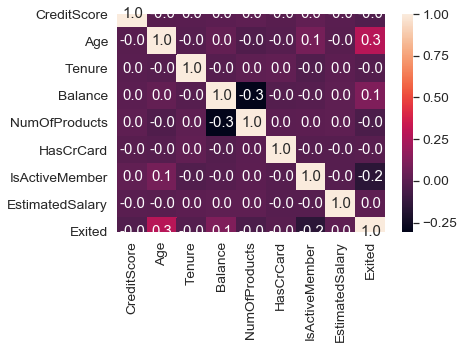

In [35]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(dataset.corr(), annot = True,fmt = ".1f")
plt.show()

<h3><b>:::::The function to visualize the box plot for the outlier detection for the CreditScore features:::::</b></h3><br>

In [36]:
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )

new_df = dataset[numerical_column[:1]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

<h3><b>:::::The function to visualize the box plot for the outlier detection for the Age and Tenure features:::::</b></h3><br>

In [37]:
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = dataset[numerical_column[1:3]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

<h3><b>:::::The function to visualize the box plot for the outlier detection for the Balance and EstimatedSalary features:::::</b></h3><br>

In [38]:
trace = []
def gen_boxplot(df):
    for feature in df:
        trace.append(
            go.Box(
                name = feature,
                y = df[feature]
            )
        )
new_df = dataset[numerical_column[3:]]
gen_boxplot(new_df)
data = trace
py.iplot(data)

<h3><b>:::::The function to to remove outlier values from  Age Feature:::::</b></h3><br>
The function will remove the outliers value from the dataset and add the median values instead of the outlier's value.

In [39]:
ageNew = []
for val in dataset.Age:
    if val <= 85:
        ageNew.append(val)
    else:
        ageNew.append(dataset.Age.median())
        
dataset.Age = ageNew

<h3><b>:::::The conversion of the categorical features into numerical using the One-Hot coding Technique.:::::</b></h3><br>
The conversion of the categorical featuers into numerical featuers using the one-hot encoding technique in which each unique value in the feature will be converted into a seperate column.

In [40]:
dataset1 = dataset

In [41]:
list_cat = ['Geography', 'Gender']
dataset1 = pd.get_dummies(dataset1, columns = list_cat, prefix = list_cat)

<h3><b>:::::The feature Selection:::::</b></h3><br>
The feature selection using the Random Forest Classifier algorithm by computing the Gini Scores.

In [42]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [44]:
X1 = dataset1.drop('Exited', axis=1)
y1 = dataset1.Exited

features_label = X1.columns

forest = RandomForestClassifier (n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(X1, y1)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for i in range(X1.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.239871
 2) Age                            0.146924
 3) Tenure                         0.144463
 4) Balance                        0.141905
 5) NumOfProducts                  0.128252
 6) HasCrCard                      0.083890
 7) IsActiveMember                 0.039927
 8) EstimatedSalary                0.020739
 9) Geography_France               0.018099
10) Geography_Germany              0.009935
11) Geography_Spain                0.008867
12) Gender_Female                  0.008583
13) Gender_Male                    0.008545


<h3><b>:::::Visualizing the Importance of the featuers on the basis of the Gini Index of the dataset:::::</b></h3><br>
<b>CreditScore</b> feature comes at the top while <b>Gender</b> features showed lowest importance.

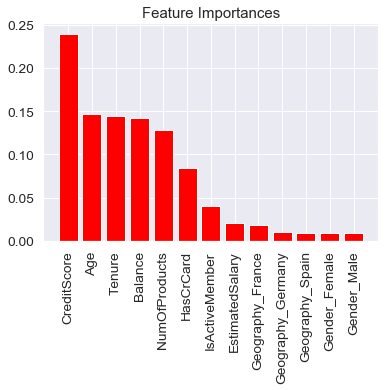

In [45]:
plt.title('Feature Importances')
plt.bar(range(X1.shape[1]), importances[indices], color = "red", align = "center")
plt.xticks(range(X1.shape[1]), features_label, rotation = 90)
plt.show()